# <center> Сегментация клиентов онлайн магазина подарков

## Постановка задачи


<center> <img src=https://salesupnow.ru/storage/app/media/pipeople.png align="right" width="300"/> </center>

Маркетинг — неотъемлемая часть любого бизнеса. Для повышения прибыли компании важно понимать своего клиента, его пожелания и предпочтения. С появлением электронной коммерции, или онлайн-продаж, стало намного проще собирать данные о клиентах, анализировать их, находить закономерности и реализовывать маркетинговые кампании.

Большинство интернет-магазинов используют инструменты веб-аналитики, чтобы отслеживать просмотры страниц, количество и поведение посетителей и коэффициент отказов. Но отчёта из Google Analytics или аналогичной системы может быть недостаточно для полного понимания того, как клиенты взаимодействуют с сайтом. Компаниям важно иметь возможность быстро и точно реагировать на перемены в поведении клиентов, создавая инструменты, которые обнаруживают эти изменения практически в режиме реального времени.

Машинное обучение помогает поисковой системе анализировать огромное количество данных о посетителях платформы, узнавать модели поведения профессиональных покупателей, определять категорию клиентов (например, лояльные/перспективные/новички/спящие/ушедшие) и выбирать правильную стратегию взаимодействия с ними.

Стоит также отметить, что компании, использующие машинное обучение на своих платформах электронной коммерции, могут постоянно повышать эффективность бизнес-процессов: настраивать товарную выборку персонально для каждого покупателя и предлагать выгодную цену в соответствии с бюджетом клиента и т. д. Эта задача относится к категории построения рекомендательных систем, речь о которых пойдёт в следующем разделе нашего курса.

> Как правило, наборы данных для электронной коммерции являются частной собственностью и, следовательно, их трудно найти среди общедоступных данных. Однако [The UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php)  создал набор данных, содержащий фактические транзакции за 2010 и 2011 годы. С ним нам как раз и предлагается поработать в этом кейсе. 

> В нашем распоряжении будет набор данных, который содержит все транзакции, произошедшие в период с 01/12/2010 по 09/12/2011 для базирующейся в Великобритании компании, занимающейся онлайн-розничной торговлей. Компания в основном продает уникальные подарки на все случаи жизни. Многие клиенты компании являются оптовиками.


**Бизнес-задача:** произвести сегментацию существующих клиентов, проинтерпретировать эти сегменты и определить стратегию взаимодействия с ними.

**Техническая задача для вас как для специалиста в Data Science:** построить модель кластеризации клиентов на основе их покупательской способности, частоты заказов и срока давности последней покупки, определить профиль каждого из кластеров.

**Основные цели проекта:**
1. Произвести предобработку исходного набора данных о транзакциях.
2. Провести разведывательный анализ данных и выявить основные закономерности.
3. Сформировать набор данных о характеристиках каждого из уникальных клиентов.
4. Построить несколько моделей машинного обучения, решающих задачу кластеризации клиентов, определить количество кластеров и проинтерпретировать их.
5. Спроектировать процесс предсказания категории интересов клиента и протестировать вашу модель на новых клиентах.




## Данные и их описание

Данные представляют собой таблицу в формате CSV, в каждой строке которой содержится информация об уникальной транзакции.

Признаки, описывающие каждую транзакцию:

* InvoiceNo — номер счёта-фактуры (уникальный номинальный шестизначный номер, присваиваемый каждой транзакции; буква "C" в начале кода указывает на отмену транзакции);
* StockCode — код товара (уникальное пятизначное целое число, присваиваемое каждому отдельному товару);
* Description — название товара;
* Quantity — количество каждого товара за транзакцию;
* InvoiceDate — дата и время выставления счёта/проведения транзакции;
* UnitPrice — цена за единицу товара в фунтах стерлингов;
* CustomerID — идентификатор клиента (уникальный пятизначный номер, однозначно присваиваемый каждому клиенту);
* Country — название страны, в которой проживает клиент.



Импорт базовых библиотек:

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

from IPython.display import display, HTML

import warnings 
warnings.filterwarnings("ignore")

plt.rcParams["patch.force_edgecolor"] = True

## 1. Знакомство со структурой данных

Первым делом необходимо понять, с какими данными предстоит работать, и произвести базовую предобработку данных — перевести признаки в необходимые для дальнейшей работы форматы.

Познакомьтесь с исходными данными поближе:

* Проведите статистический анализ исходных данных, посмотрев на основные диапазоны исходных признаков.
* Узнайте, сколько уникальных клиентов совершали транзакции в указанный период.
* Узнайте, из каких стран совершались транзакции.
* Исследуйте данные на наличие пропусков и дубликатов.
* Переведите столбцы в корректные форматы (например, даты в формат datetime).

In [164]:
data = pd.read_csv(
    "./data/pj6_data.zip", 
    encoding="ISO-8859-1", 
    dtype={'CustomerID': str,'InvoiceID': str}
)
print('Data shape: ', data.shape)
data.head(5)

Data shape:  (541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


In [165]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  object 
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 33.1+ MB


In [99]:
data.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.55,218.08,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.61,96.76,-11062.06,1.25,2.08,4.13,38970.0


  - Пропущенные значения есть?

In [100]:
# data.columns[data.isna().sum() > 0]
missing_values = [(i, v) for i, v in data.isna().sum().items() if v > 0]
print(f'{missing_values=}')

missing_values=[('Description', 1454), ('CustomerID', 135080)]


- Дубликаты есть?

In [101]:
print(f'Число дубликатов: {data.duplicated().sum()}\n')

Число дубликатов: 5268



- Преобразуем 'InvoiceDate' в формат даты

In [166]:
# 12/1/2010 8:26
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format='%m/%d/%Y %H:%M')
print(f"Date interval {data['InvoiceDate'].dt.date.min()} to {data['InvoiceDate'].dt.date.max()}")

Date interval 2010-12-01 to 2011-12-09


- Число уникальных транзакций по месяцам
- Число уникальных клиентов совершавшие транзакции по месяцам.

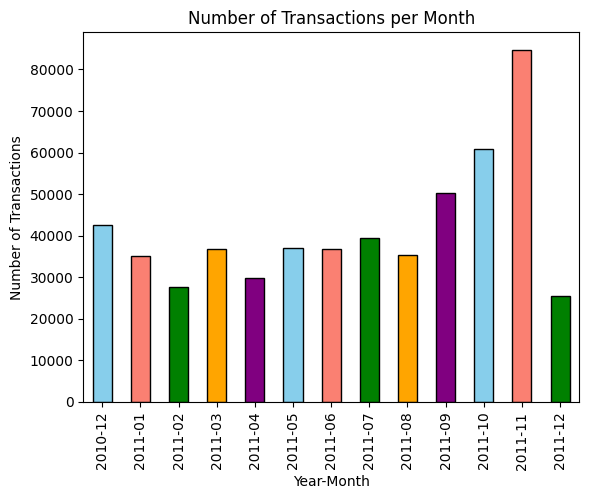

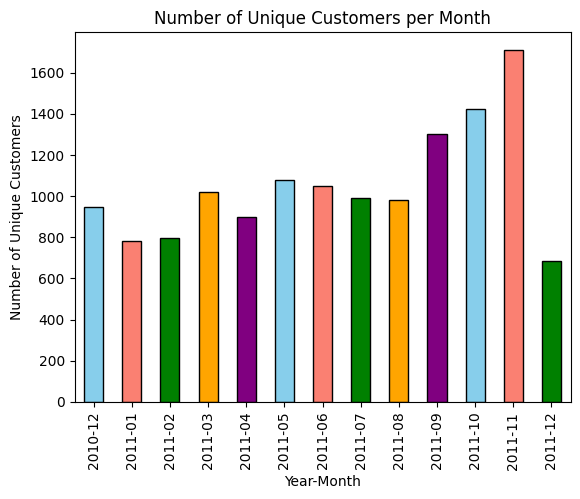

In [103]:
data['YearMonth'] = data['InvoiceDate'].dt.to_period('M')

data['YearMonth'].value_counts().sort_index().plot(kind='bar', color=['skyblue', 'salmon', 'green', 'orange', 'purple'])
plt.title('Number of Transactions per Month')
plt.xlabel('Year-Month')
plt.ylabel('Number of Transactions')
plt.show()

data.groupby('YearMonth')['CustomerID'].nunique().plot(kind='bar', color=['skyblue', 'salmon', 'green', 'orange', 'purple'])
plt.title('Number of Unique Customers per Month')
plt.xlabel('Year-Month')
plt.ylabel('Number of Unique Customers')

data.drop(columns='YearMonth',inplace=True)

- Число уникальных клиентов по странам

In [169]:
data.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False)

Country
United Kingdom          3950
Germany                   95
France                    87
Spain                     31
Belgium                   25
Switzerland               21
Portugal                  19
Italy                     15
Finland                   12
Austria                   11
Norway                    10
Netherlands                9
Australia                  9
Channel Islands            9
Denmark                    9
Cyprus                     8
Sweden                     8
Japan                      8
Poland                     6
USA                        4
Canada                     4
Unspecified                4
Israel                     4
Greece                     4
EIRE                       3
Malta                      2
United Arab Emirates       2
Bahrain                    2
Lithuania                  1
Czech Republic             1
Lebanon                    1
RSA                        1
Saudi Arabia               1
Singapore                  1
Icelan

## 2. Преобразование, очистка и анализ данных

### 2.1. Преобразование и очистка данных о транзакциях

#### 2.1.1 Пропуски

Пропуски в столбце с идентификатором клиента (CustomerID) и описанием товара свидетельствуют о некорректных/незавершённых транзакциях. Удалите их из данных.

**Примечание.** Если посмотреть на распределение пропусков в столбцах Description и CustomerID, то можно заметить, что достаточно удалить строки, содержащие пропуски в столбце CustomerID, тогда пропуски в столбце Description удаляются автоматически.


In [170]:
len_before = len(data)
data.dropna(subset=['CustomerID'],inplace=True)
print('Total is null: ', data.isna().sum().sum())
print('Очищено :', len_before - len(data))

Total is null:  0
Очищено : 135080


#### 2.1.2. Дубликаты

Проверьте данные на наличие дубликатов. Удалите их из данных.


In [171]:
print(f'Число дубликатов до: {data.duplicated().sum()}\n')
data.drop_duplicates(inplace=True)
print(f'Число дубликатов после: {data.duplicated().sum()}\n')


Число дубликатов до: 5225

Число дубликатов после: 0



#### 2.1.3. Транзакции с отрицательным количеством товара

Из приведённых выше инсайтов о данных мы узнали все особенности отмены заказов. Когда мы будем сегментировать клиентов, мы будем определять их покупательскую способность. При расчёте покупательской способности нам будет очень важно учесть возвраты этого клиента.

Чтобы подсчитать количество возвратов, для начала нам надо определить, сколько уникальных товаров указано в транзакции (корзине) для каждой уникальной пары «клиент — заказ»:


In [172]:
temp = data.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()
nb_products_per_basket = temp.rename(columns = {'InvoiceDate':'Number of products'})
nb_products_per_basket.head()

,CustomerID,InvoiceNo,Number of products
0,12346,541431,1
1,12346,C541433,1
2,12347,537626,31
3,12347,542237,29
4,12347,549222,24


**Примечание.** Более 16 % уникальных заказов являются возвратами. Интересный факт: если мы подсчитали количество транзакций, содержащих признак возврата, в изначальной таблице, где на каждый уникальный товар заведена отдельная строка, то мы получили бы, что количество возвратов менее 1 %. Однако это число было бы некорректным.

Создайте в ваших данных о транзакциях признак `QuantityCanceled`. Этот признак будет указывать на количество отменённого впоследствии товара для каждой транзакции, на которую найдётся противоположная ей транзакция с возвратом. Для транзакций, для которых не было возвратов, признак будет равен 0. Для транзакций, для которых указано отрицательное количество товара, но в данных отсутствует контрагент, признак будет пустым.

В качестве вспомогательного инструмента мы подготовили для вас функцию `get_quantity_canceled()`. Эта функция принимает на вход таблицу с транзакциями и возвращает объект `Series` — столбец, в котором указано количество отменённого впоследствии товара для каждой транзакции. Если транзакция не имеет контрагента, этот признак помечается как `NaN`.

Отметим, что эта функция не учитывает сложный случай, когда количество отменённого товара в транзакции-возврате больше, чем количество товара, которое указано в любой из отдельных транзакций на покупку (это случай, когда клиент сделал несколько заказов одного и того же товара, а потом оформил возврат на все товары разом). При желании вы можете самостоятельно модифицировать функцию для предобработки, чтобы учесть этот пограничный случай.

*Осторожно! Поиск отменённых транзакций занимает много времени из-за большого количества строк в таблице. Выполнение следующего кода может занять до 20 минут в зависимости от мощности компьютера.*

In [108]:
def get_quantity_canceled(data):
    """Функция для создания признака количества отменённых заказов. 
    Функция принимает на вход таблицу и возвращает столбец, в котором указано количество отменённого впоследствии товара для кажой транзакции.
    Если транзакция с отрицательным количеством товара не имеет контрагента, данный признак помечается как NaN.

    Args:
        data (DataFrame): таблица с транзакциями

    Returns:
        Series: столбец с количеством отменённого товара
    """
    # Инициализируем нулями Series той же длины, что и столбцы таблицы.
    quantity_canceled = pd.Series(np.zeros(data.shape[0]), index=data.index)    
    negative_quantity = data[(data['Quantity'] < 0)].copy()
    for index, col in negative_quantity.iterrows():
        # Создаём DataFrame из всех контрагентов
        df_test = data[(data['CustomerID'] == col['CustomerID']) &
                       (data['StockCode']  == col['StockCode']) & 
                       (data['InvoiceDate'] < col['InvoiceDate']) & 
                       (data['Quantity'] > 0)].copy()
        # Транзация-возврат не имеет контрагента — ничего не делаем
        if (df_test.shape[0] == 0): 
            # Помечаем столбец как пропуск
            quantity_canceled.loc[index] = np.nan
        # Транзакция-возврат имеет ровно одного контрагента
        # Добавляем количество отменённого товара в столбец QuantityCanceled 
        elif (df_test.shape[0] == 1): 
            index_order = df_test.index[0]
            quantity_canceled.loc[index_order] = -col['Quantity']       
        # Транзакция-возврат имеет несколько контрагентов
        # Задаём количество отменённого товара в столбец QuantityCanceled для той транзакции на покупку,
        # в которой количество товара больше количества товаров в транзакции-возврате.
        elif (df_test.shape[0] > 1): 
            df_test.sort_index(axis=0 ,ascending=False, inplace = True)        
            for ind, val in df_test.iterrows():
                if val['Quantity'] < -col['Quantity']: 
                    continue
                quantity_canceled.loc[ind] = -col['Quantity']
                break    
    return quantity_canceled

data['QuantityCanceled'] = get_quantity_canceled(data)

Интересный пример
data.loc[86893:86896]\
Отмененная транзакция: клиент, товар, дата совпадает, но цена возврата разная

- Попытка оптимизации функции по времени get_quantity_canceled()

In [173]:
# Версия 1
# get_quantity_canceled() - 14,36 minutes
# get_quantity_canceled_optmized() - 45,2 secunds

def get_quantity_canceled_optmized(data):
    """Функция для создания признака количества отменённых заказов. 
    Функция принимает на вход таблицу и возвращает столбец, в котором указано количество отменённого впоследствии товара для кажой транзакции.
    Если транзакция с отрицательным количеством товара не имеет контрагента, данный признак помечается как NaN.

    Args:
        data (DataFrame): таблица с транзакциями

    Returns:
        Series: столбец с количеством отменённого товара
    """

    columns_for_search = ['CustomerID', 'StockCode', 'InvoiceDate', 'Quantity']

    filter_id_list = data[data['Quantity'] < 0]['CustomerID'].unique().tolist()

    df_filtered = data[data['CustomerID'].isin(filter_id_list)][columns_for_search].copy()
    quantity_canceled = pd.Series(np.zeros(data.shape[0]), index=data.index)

    for cust_id in filter_id_list:
        data_id = df_filtered.query(f"CustomerID=='{cust_id}'")
        # print(f"\nId:{cust_id} - len={len(data_id)}")
        canceled_transactions = data_id[data_id.Quantity < 0]
        # print(f"len_canceled_transactions = {len(canceled_transactions)}")
    
        for i, canceled_transaction in canceled_transactions.iterrows():
            relevant_data = data_id[
                (data_id['CustomerID'] == canceled_transaction['CustomerID']) &
                (data_id['StockCode'] == canceled_transaction['StockCode']) & 
                (data_id['InvoiceDate'] < canceled_transaction['InvoiceDate']) &
                (data_id['Quantity'] > 0)].copy()
        
            # if not relevant_data.empty: print(relevant_data.values)
            if relevant_data.shape[0] == 0:
                # Транзакция-возврат не имеет контрагента — ничего не делаем
                quantity_canceled.loc[i] = np.nan
            elif relevant_data.shape[0] == 1:
                # Транзакция-возврат имеет ровно одного контрагента
                # Добавляем количество отменённого товара в столбец QuantityCanceled
                quantity_canceled.loc[relevant_data.index[0]] = -canceled_transaction['Quantity']
            else:
                # Транзакция-возврат имеет несколько контрагентов
                # Задаём количество отменённого товара в столбец QuantityCanceled для той транзакции на покупку,
                # в которой количество товара больше количества товаров в транзакции-возврате.
                relevant_data.sort_index(axis=0, ascending=False, inplace=True)
                remaining_quantity = -canceled_transaction['Quantity']
                for ind, val in relevant_data.iterrows():
                    if val['Quantity'] < remaining_quantity:
                        continue
                    quantity_canceled.loc[ind] = remaining_quantity
                    break
    return quantity_canceled
        
data['QuantityCanceled'] = get_quantity_canceled_optmized(data)
# print(f"Are columns identical? {data['QuantityCanceled'].equals(data['QuantityCanceled2'])}")
# Are columns identical? True

- Попытка создать оптимизированную версии функкции get_quantity_canceled, версия 2

In [176]:
# get_quantity_canceled() - 14,36 minutes
# get_quantity_canceled_optmized() - 45,2 secunds
# get_quantity_canceled_optmized2 - 1,1 secunds

def get_quantity_canceled_optmized2(data):
    # --------------- Step 1 -----------------
    # Выберем столбцы для учета отмены заказа
    columns = ['indx','CustomerID', 'StockCode', 'InvoiceDate', 'Quantity']
    # Сохраним индексы для далнейего использования
    data['indx'] = data.index
    # Список с отменой заказа
    df_canceled_transactions = data[data.Quantity < 0][columns] #8872
    # Заказы с Quantity > 0
    df_transactions = data[data.Quantity > 0][columns]
    # Внутреннее обьединение по столбцу CustomerID', 'StockCode
    df_merged = (pd.merge(df_transactions, df_canceled_transactions,
                           how='inner',
                           on=['CustomerID', 'StockCode'],
                           suffixes=('', '_return'))
               .rename(columns={'Quantity_return': 'QuantityCanceled'})
    )
    df_merged['QuantityCanceled'] = -df_merged['QuantityCanceled']

    # Выберем записи для которой дата возврата больше чем дата заказа и
    # кол-во возрата меньше или равно кол-ву заказа 
    # ( хотя может так что заказали три раза по две, а отмена на 4) Такие ситуации не учтет, и выкинет записи
    # Оставим некоторые столбцы для далнейшей работы
    df_orders = df_merged[(df_merged['InvoiceDate'] < df_merged['InvoiceDate_return']) & #(15492, 8)
                      (df_merged['Quantity'] >= df_merged['QuantityCanceled']) # 10259
                      ][['indx','indx_return','Quantity', 'QuantityCanceled']]

    # print(df_merged.shape) #(23805, 8)
    # Пример 2 заказа и три отмены
    # df_orders[df_orders['indx'].isin([362426,382683])]

    # -------------- unique_combinations --------------------
    unique_combinations = []
    used_indx = set()
    used_indx_return = set()

    df_orders = df_orders.sort_values(by=['indx', 'QuantityCanceled'], ascending=[True, False])

    for group_indx_return, group_indx in df_orders.groupby('indx_return')['indx']:
        available_values = set(group_indx.tolist()) - used_indx
    
        if available_values:
            selected_value = available_values.pop()
            unique_combinations.append((group_indx_return, selected_value))
            used_indx.add(selected_value)
            used_indx_return.add(group_indx_return)

    # print(len(unique_combinations))

    df_unique_combinations = pd.DataFrame(unique_combinations, columns=['indx_return', 'indx'])
    df_unique_combinations = pd.merge(df_unique_combinations, df_orders,
                           how='left',
                           on=['indx_return', 'indx']
    )
    df_unique_combinations = df_unique_combinations.set_index('indx').sort_index(ascending=True)
    df_unique_combinations.index.name = None

    # df_unique_combinations.head(3)

    #------------------- Adding  -------------
    adding_indx_return = set()
    unused_indx_return = set(df_orders['indx_return']) - set(used_indx_return)
    # print('Len of unused_indx_return: ', len(unused_indx_return))
    df_filtered = df_orders[df_orders['indx_return'].isin(unused_indx_return)]
    for _, row in df_filtered.iterrows():
        quantity_canceled = row['QuantityCanceled']
        index = row['indx']
        result_row = df_unique_combinations.loc[index]
        if not result_row.empty:
            quantity, quantity_return = result_row[['Quantity', 'QuantityCanceled']]
            if quantity >= (quantity_return + quantity_canceled):
                df_unique_combinations.loc[index, 'QuantityCanceled'] = quantity_return + quantity_canceled
                adding_indx_return.add(row['indx_return'])

    # print('adding_indx_return: ', len(adding_indx_return))

    # Пример, почему не попали некоторые записи 4, -4, -4, 4
    # data[(data['CustomerID'] == '15502') &
    #             (data['StockCode']  == '22926')]


    #---------------- 4 -----------------
    data.drop(columns='indx',inplace=True)
    data['QuantityCanceled2'] = 0
    data.loc[df_unique_combinations.index, 'QuantityCanceled2'] = df_unique_combinations['QuantityCanceled']
    # Проверим сколько единиц товаров учли
    print('Число учтенных товаров на возврат (1): ', data['QuantityCanceled'].sum())
    print('Число учтенных товаров на возврат (2): ', data['QuantityCanceled2'].sum())

get_quantity_canceled_optmized2(data)

Число учтенных товаров на возврат (1):  245266.0
Число учтенных товаров на возврат (2):  247907


- По времени почти отличная, но попались такие, что число заказов меньше, чем число отмены заказов\
- так что оптимизация не удалась, нужно учитывать кол-во, складывать и помечать, что усложняет алгоритм\
- Алгоритм просто ищет подходящее сочетание с учетом требования по совпадению\
- клиент, товар,  дата отмены старше даты заказа и что кол-во отмены меньше или равно кол-ву заказа
- Хотя в данном алгоритме число помеченных записей с отменой больше чем первоначальная, \
- и алгоритм почти абсолютный что в предыдущих
- P.S: Доработано, полностью рабочая версия

In [177]:
# Оставляем первоначальную версию столбца
data.drop(columns='QuantityCanceled2', inplace=True)

Узнайте, сколько транзакций в данных не имеют контрагентов, и, если их количество невелико, удалите их из данных.

Когда вы разобрались с возвратами, удалите транзакции с отрицательным количеством товара — они нам больше не нужны.



In [178]:
print('Число записей с отмененными транзакциями: ', len(data[data['Quantity'] < 0 ]))
shape_before = data.shape
print(f"Число транзакций, не имеющие контрагентов (до очистки): {data['QuantityCanceled'].isna().sum()}")
data.dropna(subset=['QuantityCanceled'],inplace=True)
print(f"Число транзакций, не имеющие контрагентов (после очистки): {data['QuantityCanceled'].isna().sum()}")

Число записей с отмененными транзакциями:  8872
Число транзакций, не имеющие контрагентов (до очистки): 1303
Число транзакций, не имеющие контрагентов (после очистки): 0


In [179]:
len_before = data.shape[0]
data = data.drop(index=data[data['Quantity'] < 0 ].index)
print(f'Drop rows: {len_before -data.shape[0]}')
print(f'Total drop rows: {shape_before[0] -data.shape[0]}')

Drop rows: 7569
Total drop rows: 8872


- В алгоритме нет нужды прописывать NaN для 'QuantityCanceled'

#### 2.1.4. Специализированные транзакции

Следующая задача — обработать специальные виды транзакций, которые обозначаются латинскими буквами.

В данных присутствует шесть специальных видов транзакций. С помощью регулярных выражений найдите такие коды товаров (StockCode), которые начинаются с латинских букв (при этом коды могут содержать цифры).

**Подсказка.** В качестве шаблона для поиска используйте строку '^[a-zA-Z]+'.

Чтобы понять, что означают эти коды, можно заглянуть в столбец с описанием (Description), например POST означает почтовые расходы, C2 — расходы на транспортировку, BANK CHARGES — банковские расходы.

Специальные операции не характеризуют покупательскую способность клиентов, так как не относятся напрямую к их покупкам, поэтому такие записи нам не нужны. Удалите все специальные транзакции из таблицы.

In [180]:
print('Число записей до очистки: ', len(data))
indices = data[data['StockCode'].str.match('^[a-zA-Z]+')].index
# print(len(indices))
data.drop(index=indices, axis=0, inplace=True)
print('Число записей после очистки: ', len(data))

Число записей до очистки:  392732
Число записей после очистки:  391183


#### 2.1.5. Транзакции с товарами без стоимости

При просмотре описательных статистик можно заметить, что на некоторые товары установлена цена в 0 фунтов стерлингов. Таких транзакций оказывается менее 1 % — можно удалить их.

In [181]:
len_before = len(data)
indices = data[data['UnitPrice'] == 0].index
# print(len(indices))
data.drop(index=indices, axis=0, inplace=True)
print(f'Удалено {len_before - len(data)} записей после очистки.')

Удалено 33 записей после очистки.


#### 2.1.6. Общая стоимость товаров в транзакции

Добавьте в ваш датасет общую цену заказа (TotalPrice). Она рассчитывается как:
 
 **общая цена = цена за единицу товара * (количество товаров в заказе - количество возвращённых товаров).**

Этот признак впоследствии поможет вам рассчитать покупательскую способность каждого из клиентов.

In [182]:
data['TotalPrice'] = data['UnitPrice'] * (data['Quantity'] - data['QuantityCanceled'])

Помимо рекомендованных преобразований, вы также можете придумать собственные и применить их к исходным данным.
После завершения предобработки сохраните результат очищения данных в отдельный файл, чтобы впоследствии вам не приходилось повторять эти действия.


In [183]:
filename = 'cleared_project6'

data.to_csv(f'data/{filename}.zip', index=False,
          compression=dict(method='zip', archive_name=f'{filename}.csv'))
# data = pd.read_csv(f'data/{filename}.zip')
# data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format='%m/%d/%Y %H:%M')

### 2.2. Разведывательный анализ

После предобработки исходных данных произведите разведывательный анализ и исследуйте транзакции, ответив на следующие вопросы:

* Клиенты из каких стран покупают больше и чаще?
* Какие страны приносят наибольшую сезонную выручку?
* Присутствует ли в продажах сезонность (когда покупают чаще)?
* Сгруппируйте данные по датам и часам совершения транзакции и найдите количество заказов на каждый день-час. Затем найдите среднее количество ежедневно поступающих заказов в каждый из часов.
* Каково распределение среднего количества ежедневно поступающих заказов по времени суток (часу совершения транзакции)? 

**Примечание.** Вы можете сформулировать и другие вопросы. Главная цель — извлечь максимум понятной информации из исходных данных.

Свои рассуждения сопроводите графиками и диаграммами.



* Число клиентов, отобранных из топ-стран, покупающие больше и чаще.

In [184]:
# Число уникальных заказов (InvoiceNo) и клиентов (CustomerID) по каждой стране
country_summary = (data.groupby('Country')
    .agg({'CustomerID': 'nunique', 'InvoiceNo': 'nunique'})
    .sort_values(by='CustomerID', ascending=False)
    .rename(columns={'InvoiceNo': 'UniqueOrders','CustomerID': 'UniqueCustomers'})
    .head(10)
)

# Отношение кол-во заказов на одного клиента
country_summary['OrdersPerCustomerRatio'] = country_summary['UniqueOrders'] / country_summary['UniqueCustomers']

country_summary.round(2).style.apply(lambda x: ['color: green' if v == x.max() else '' for v in x], axis=0)

,UniqueCustomers,UniqueOrders,OrdersPerCustomerRatio
Country,,,
United Kingdom,3916,16579,4.230000
Germany,94,443,4.710000
France,87,379,4.360000
Spain,30,88,2.930000
Belgium,25,98,3.920000
Switzerland,21,47,2.240000
Portugal,19,49,2.580000
Italy,14,35,2.500000
Finland,12,40,3.330000


* Cтраны, приносяшие наибольшую сезонную выручку.
* Средний чек покупателей

In [190]:
summary_df = (data.groupby('Country')['TotalPrice']
              .agg(['sum', 'mean'])
              .sort_values(by='sum', ascending=False)
              .rename(columns={'sum': 'TotalSumPrice', 'mean': 'AveragePricePerPurchase'})
              .head(10)
)
summary_df.style.apply(lambda x: ['color: green' if v == x.max() else '' for v in x], axis=0)

,TotalSumPrice,AveragePricePerPurchase
Country,,
United Kingdom,6797691.440000,19.484772
Netherlands,283443.540000,122.068708
EIRE,247074.570000,34.672266
Germany,201520.710000,23.316060
France,181529.630000,22.637440
Australia,136950.250000,116.059534
Switzerland,51863.750000,28.654006
Spain,51764.900000,21.417005
Belgium,36673.040000,18.952475


* Сезонность продаж.

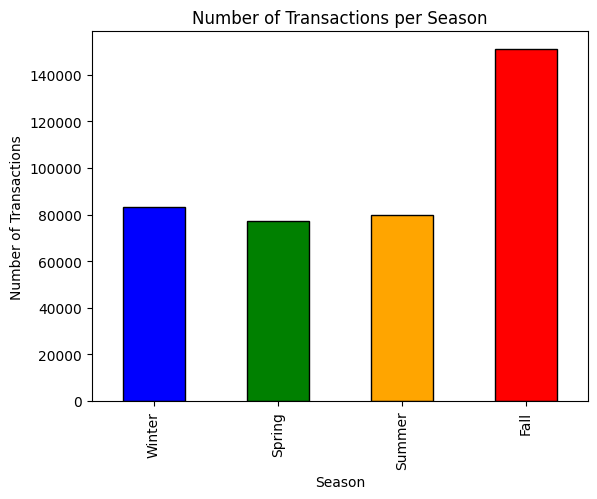

In [191]:
data['YearMonth'] = data['InvoiceDate'].dt.to_period('M')

data['Season'] = data['InvoiceDate'].dt.month.map({
    1: 'Winter', 2: 'Winter', 3: 'Spring',
    4: 'Spring', 5: 'Spring', 6: 'Summer',
    7: 'Summer', 8: 'Summer', 9: 'Fall',
    10: 'Fall', 11: 'Fall', 12: 'Winter'
})

season_order = ['Winter', 'Spring', 'Summer', 'Fall']

data['Season'].value_counts().loc[season_order].plot(kind='bar', color=['blue', 'green', 'orange', 'red'])

plt.title('Number of Transactions per Season')
plt.xlabel('Season')
plt.ylabel('Number of Transactions')
plt.show()

data.drop(columns=['YearMonth', 'Season'], inplace=True)


* Сгруппируйте данные по датам и часам совершения транзакции и найдите количество заказов на каждый день-час. Затем найдите среднее количество ежедневно поступающих заказов в каждый из часов.

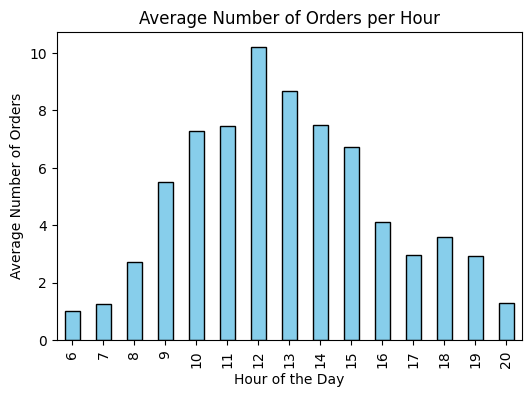

In [192]:
data['Hour'] = data['InvoiceDate'].dt.to_period('H')

# Число заказов по часам (заказы могут повторяться из-за кол-во наименований товаров)
# Используем .nunique() a не count()
orders_per_hour = data.groupby('Hour')['InvoiceNo'].nunique()

# Среднее количество заказов в каждый из часов
average_orders_per_hour = orders_per_hour.groupby(orders_per_hour.index.hour).mean()

average_orders_per_hour.plot(kind='bar', color='skyblue', figsize =(6,4))
plt.title('Average Number of Orders per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Orders')
plt.show()

data.drop(columns=['Hour'], inplace=True)

* Распределение количества заказов от времени суток почти близка к нормальному.


### 2.3. Построение RFM-таблицы и поиск RFM-выбросов

Мы добрались до самой интересной части нашей задачи. Нам предстоит сформировать признаки, на основе которых мы будем производить сегментацию клиентов.

Для этого давайте познакомимся с очень популярным методом для анализа потребительской ценности под названием RFM. 

<center> <img src=MATHML_PJ_6_2_5.png MATHML_PJ_6_2_5 align="right" width="300"/> </center>


Метод заключается в группировке клиентов на основе следующих параметров:
* Recency (Давность) — давность последней покупки клиента;
* Frequency (Частота) — общее количество покупок клиента;
* Monetary Value (Денежная ценность) — сколько денег потратил клиент.


Суть RFM-анализа состоит в том, что мы разделяем всех клиентов на группы в зависимости от того, как давно они сделали последнюю покупку, как часто покупали и насколько большой была сумма их заказов. 

Например, вот так может выглядеть интерпретация кластеров для случая RF-сегментации (анализа на основе давности и частоты заказов клиента):

<img src=https://retailrocket.ru/wp-content/uploads/2017/06/rfm-1.png>

Задача маркетологов — вести клиента в зону лояльных.

Мы можем рассчитать RFM-характеристики для каждого из клиентов в нашем датасете и на их основе с помощью методов кластеризации построить подобные сегменты клиентов, привязанные к нашим данным.

Чтобы получить RFM-таблицу, нам необходимо сгруппировать данные по идентификаторам клиента и рассчитать следующие  агрегированные характеристики:

* Recency для i-го клиента рассчитывается как разница между датой и временем последнего заказа и точкой отсчёта, переведённая в дни:
    $$t_0-max(t_{i1}, t_{i2},..., t_{iM})$$

    где $t_{ij}$ — дата и время совершения i-ым клиентом своей j-ой покупки.

    В качестве точки отсчёта $t_0$ берём дату на один день «старше», чем все наши данные. Это будет 10 декабря 2011 года (в формате datetime — '2011-12-10 00:00:00').

* Frequency рассчитывается как общее количество уникальных заказов, которые совершил i-ый клиент.
* Monetary Value рассчитывается как общая сумма денег, которую i-ый клиент потратил на наши товары (с учётом возвратов).

Когда вы рассчитаете все характеристики, не забудьте дать столбцам результирующей таблицы соответствующие названия.

In [220]:
earliest_date = pd.Timestamp('2011-12-10 00:00:00')
data['DaysToLastVisit'] = (earliest_date - data['InvoiceDate']).dt.days

rfm_table = (data.groupby('CustomerID')
              .agg({
                  'DaysToLastVisit': 'max',
                  'InvoiceNo': 'nunique',
                  'TotalPrice': 'sum'
              })
              .rename(columns={'DaysToLastVisit': 'Recency', 'InvoiceNo': 'Frequency', 'TotalPrice': 'Monetary'})
            )

После того как вы подготовите RFM-таблицу, визуализируйте каждую из трёх компонент, например, в виде коробчатых диаграмм (boxplot). Вы получите примерно следующие результаты (графики могут отличаться в зависимости от того, как вы выполните предобработку данных):

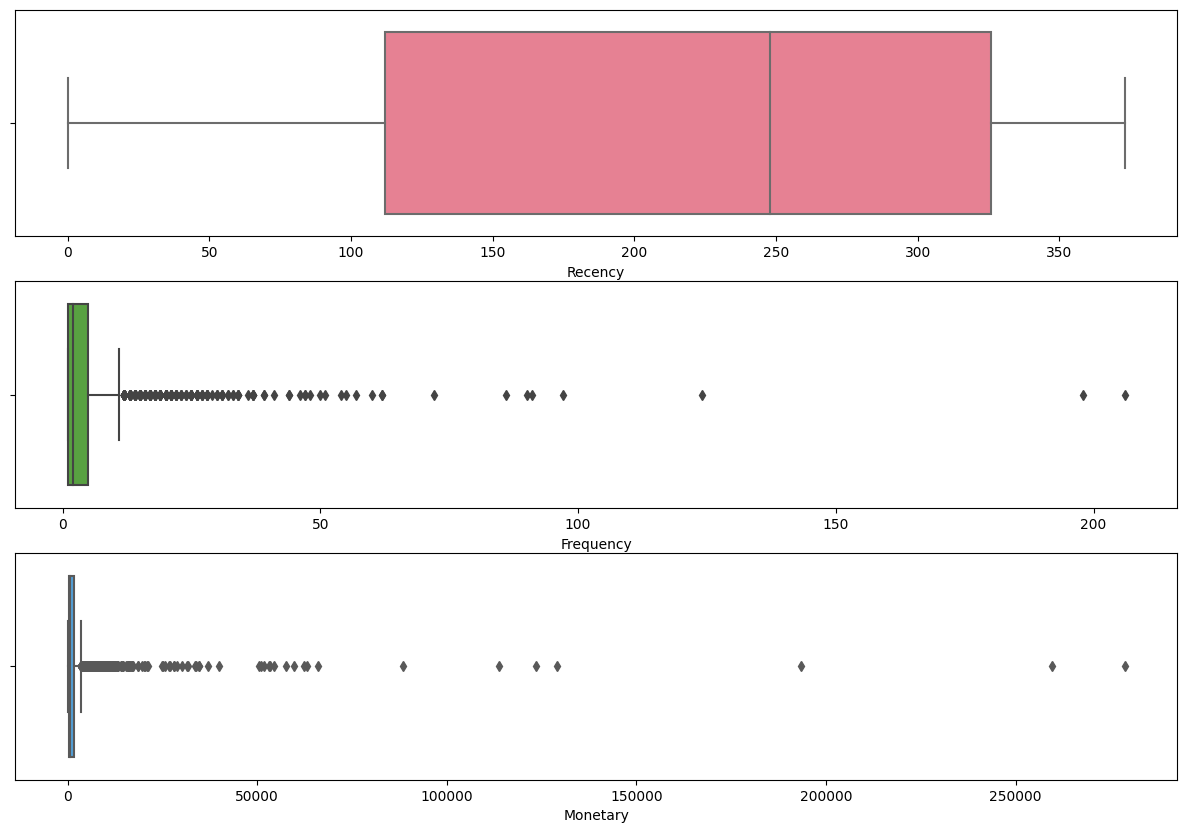

In [221]:
colors = sns.color_palette("husl", len(rfm_table.columns))
plt.figure(figsize=(15, 10))

len_rfm = len(rfm_table.columns)
for i in range(len_rfm):
    plt.subplot(len_rfm, 1, i+1)
    sns.boxplot(x=rfm_table[rfm_table.columns[i]], color=colors[i])

plt.show()

Что интересного здесь можно увидеть? Есть клиенты с аномально большим количеством сделанных заказов (более 100 штук), а также клиенты, общая стоимость заказов которых превышает 190 тысяч фунтов стерлингов.

Чем это плохо? Выбросы могут отрицательно сказаться на результатах работы методов кластеризации, неустойчивых к ним, например алгоритма KMeans, поэтому хотелось бы от них избавиться. Однако терять много ценных данных о клиентах тоже не хочется, поэтому ограничимся верхней границей соответствующей квантили уровня 0.95. Таким образом, мы удалим данные тех клиентов, для которых значение параметра Frequency или параметра Monetary выше, чем у 95 % клиентов.


(4025, 3)
(3640, 3)


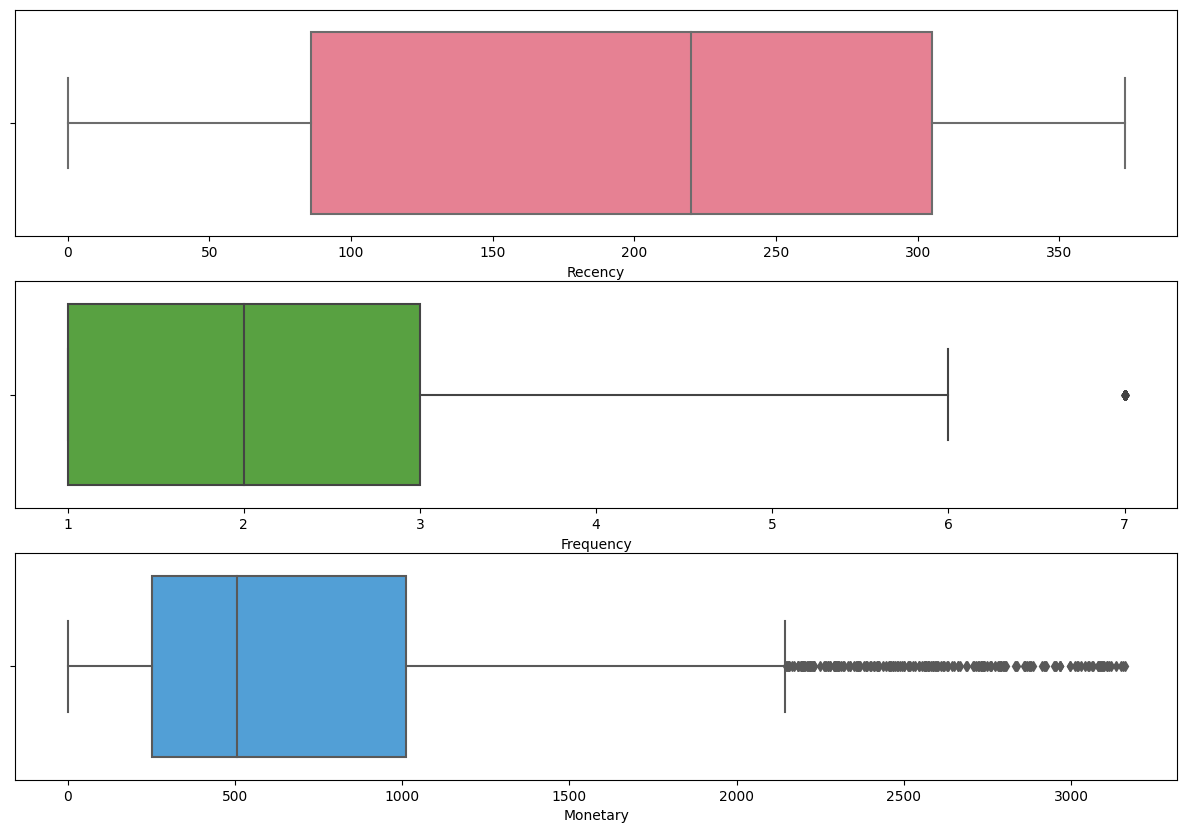

In [223]:
# Верхние границы квантилей для Frequency и Monetary
freq_upper_limit = rfm_table['Frequency'].quantile(0.95)
monetary_upper_limit = rfm_table['Monetary'].quantile(0.95)

print(rfm_table.shape)

rfm_table = (
    rfm_table[(rfm_table['Frequency'] < freq_upper_limit) 
            & (rfm_table['Monetary'] < monetary_upper_limit)]
)

print(rfm_table.shape)

colors = sns.color_palette("husl", len(rfm_table.columns))
plt.figure(figsize=(15, 10))

len_rfm = len(rfm_table.columns)
for i in range(len_rfm):
    plt.subplot(len_rfm, 1, i+1)
    sns.boxplot(x=rfm_table[rfm_table.columns[i]], color=colors[i])
plt.show()


## 3. Моделирование и оценка качества моделей

### 3.1. Кластеризация на основе RFM-характеристик

Чтобы результаты кластеризации было удобнее интерпретировать, вы можете уменьшить размерность исходных признаков до двух компонент.

**Подсказка.** Чтобы методы понижения размерности работали стабильно, данные необходимо стандартизировать/нормализовать. Для удобства оберните эти шаги по предобработке данных в pipeline.

Произведите предобработку исходных данных. На основе RFM-признаков кластеризуйте клиентов онлайн-магазина подарков с помощью известных вам методов (используйте минимум три метода).

Подберите оптимальное количество кластеров для выбранных методов с помощью коэффициента силуэта, перебирая возможные значения от 3 до 10 включительно (большее или меньшее количество кластеров будет нерелеватно для маркетинга). 

Выберите алгоритм с наибольшим коэффициентом силуэта, сделайте предсказание меток кластеров.


### 3.1.1 Частотные распределения

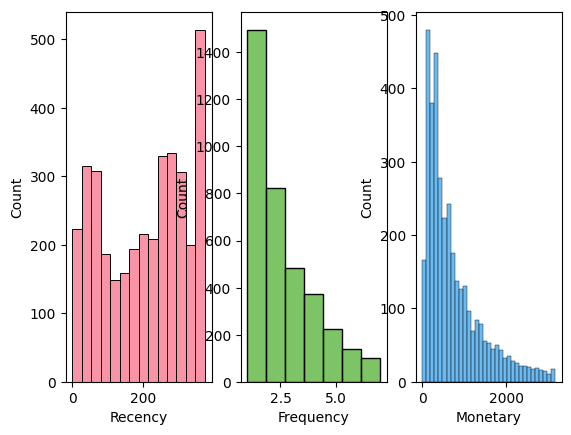

In [252]:
for i in range(len_rfm):
    plt.subplot(1,len_rfm, i+1)
    if i==1:
        sns.histplot(x=rfm_table[rfm_table.columns[i]], color=colors[i], bins=7)
    else: 
        sns.histplot(x=rfm_table[rfm_table.columns[i]], color=colors[i])
plt.show()


- Recency ближе к равномерному распределению, остальные к логарифмическому распределению

### 3.1.2 Нормализация

In [290]:
from sklearn.preprocessing import RobustScaler,StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

def log_transform(x):
    return np.log1p(x)

features_to_normalize = ['Recency', 'Log_Frequency', 'Log_Monetary']

rfm_table['Log_Frequency'] = log_transform(rfm_table['Frequency'])
rfm_table['Log_Monetary'] = log_transform(rfm_table['Monetary'])

pipeline = Pipeline([('scaler', RobustScaler())])
X_norm = pipeline.fit_transform(rfm_table[features_to_normalize])
rfm_table.drop(columns=['Log_Frequency', 'Log_Monetary'],inplace=True)


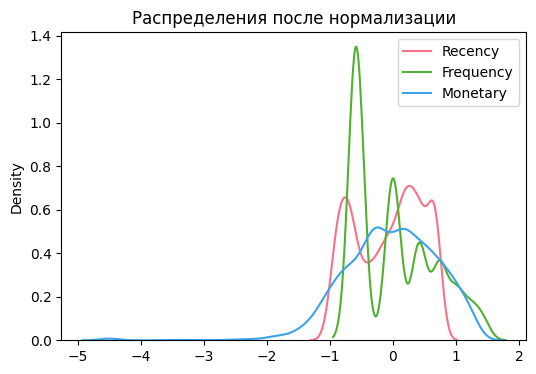

In [291]:
# оценка плотности ядра
fig, (ax1) = plt.subplots(ncols=1, figsize=(6, 4))
ax1.set_title('Распределения после нормализации')

for i in range(len_rfm):
    sns.kdeplot(x=X_norm[:, i], color=colors[i],label=rfm_table.columns[i] , ax=ax1)
plt.legend()
plt.show()

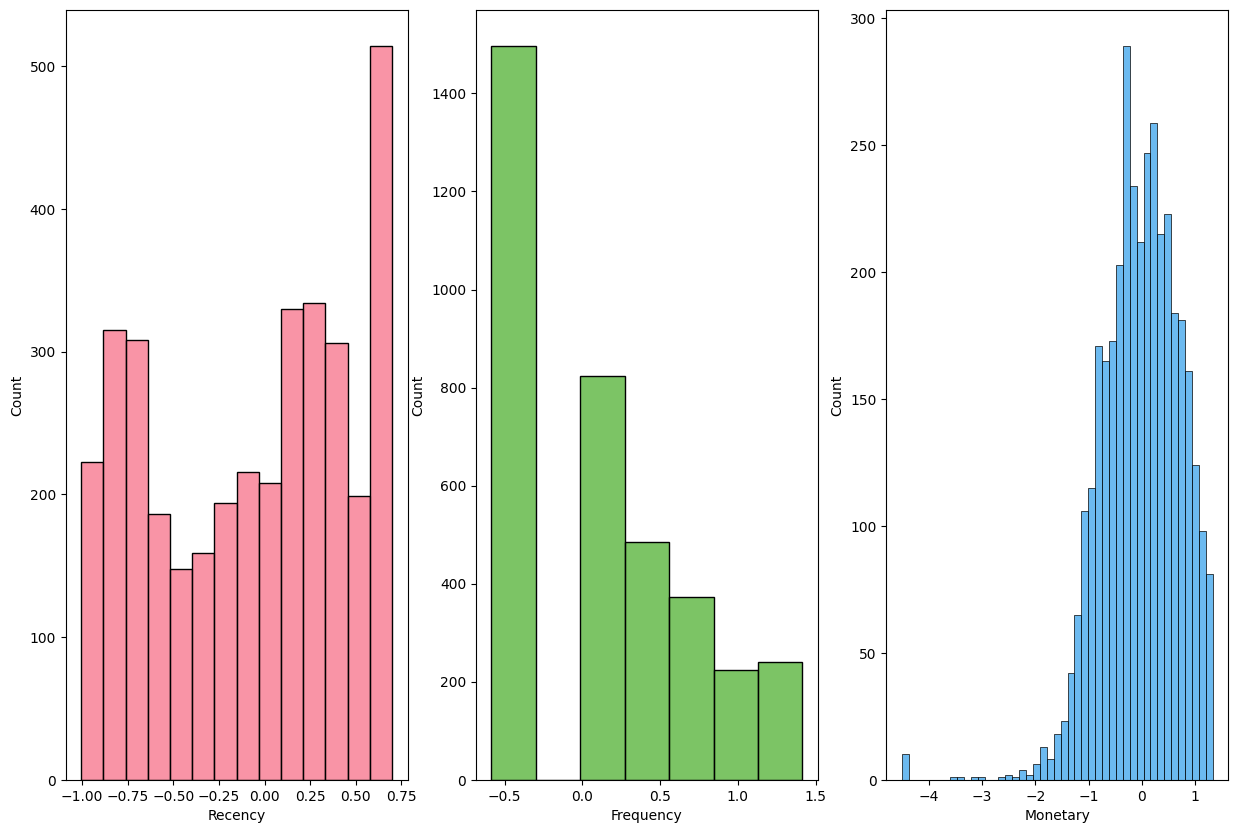

In [284]:
plt.figure(figsize=(15, 10))

len_columns = X_norm.shape[1]
for i in range(len_columns):
    plt.subplot(1,len_columns, i+1)
    if i==1 :
        sns.histplot(x=X_norm[:, i], bins=7, color=colors[i])
    else:
        sns.histplot(x=X_norm[:, i], color=colors[i]) # , bins=30, kde=True, 
    plt.xlabel(rfm_table.columns[i])
    
plt.show()

### 3.1.3 Понижение размерности

In [294]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_norm)

3.1.4 Кластеризация

Optimal for k_means clusters:  3
Optimal for Agglomerative clusters:  3
Optimal for Gaussian clusters:  3


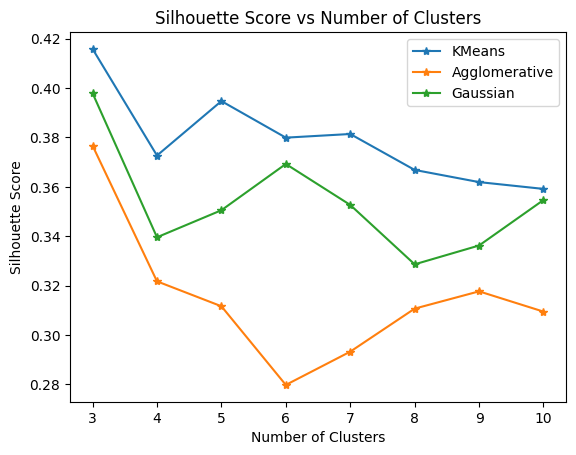

In [298]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

n_range = (3,11)

def calculate_silhouette_scores(data, model, n_range, name_param):
    result = []
    for k in range(*n_range):
        param = {name_param:k}
        labels = model.set_params(**param).fit_predict(data)
        result.append(silhouette_score(data, labels, metric='euclidean'))
    return result, result.index(max(result))+n_range[0]

silhouettes=dict()
data =X_pca

model = KMeans(init='k-means++', random_state=42)
silhouettes['KMeans'], optimal_kmeans_clusters = calculate_silhouette_scores(data, model, n_range, 'n_clusters')
print('Optimal for k_means clusters: ', optimal_kmeans_clusters)

model = AgglomerativeClustering()
silhouettes['Agglomerative'], optimal_agglom_clusters = calculate_silhouette_scores(data, model, n_range, 'n_clusters')
print('Optimal for Agglomerative clusters: ', optimal_agglom_clusters)

model = GaussianMixture(random_state=42)
silhouettes['Gaussian'], optimal_gaussian_clusters = calculate_silhouette_scores(data, model, n_range, 'n_components')
print('Optimal for Gaussian clusters: ', optimal_gaussian_clusters)

plt.title("Silhouette Score vs Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")

plt.plot([i for i in range(*n_range)], silhouettes['KMeans'], '*-', label='KMeans')
plt.plot([i for i in range(*n_range)], silhouettes['Agglomerative'], '*-', label='Agglomerative')
plt.plot([i for i in range(*n_range)], silhouettes['Gaussian'], '*-', label='Gaussian')

plt.legend()
plt.show()

- Оценка силуэта показывает, что оптимальное число кластеров -3

### 3.2. Интерпретация результатов кластеризации

Перейдём к интерпретации полученных кластеров.

#### 3.2.1. Визуализация кластеров

Визуализируйте результаты в виде 3D-диаграммы с осями Recency, Frequency и Monetary. Проанализируйте полученную диаграмму и попробуйте понять, какие кластеры у вас получились.

In [305]:
import plotly
import plotly.express as px

rfm_table['label'] = KMeans(n_clusters=optimal_kmeans_clusters, random_state = 42).fit_predict(X_pca)
# rfm_table['label'] = KMeans(n_clusters=6, random_state = 42).fit_predict(X_pca)

fig = px.scatter_3d(
    data_frame=rfm_table, 
    x = 'Frequency', 
    y = 'Recency', 
    z = 'Monetary', 
    color='label', 

    width=800,
    height=500
)

fig.show()

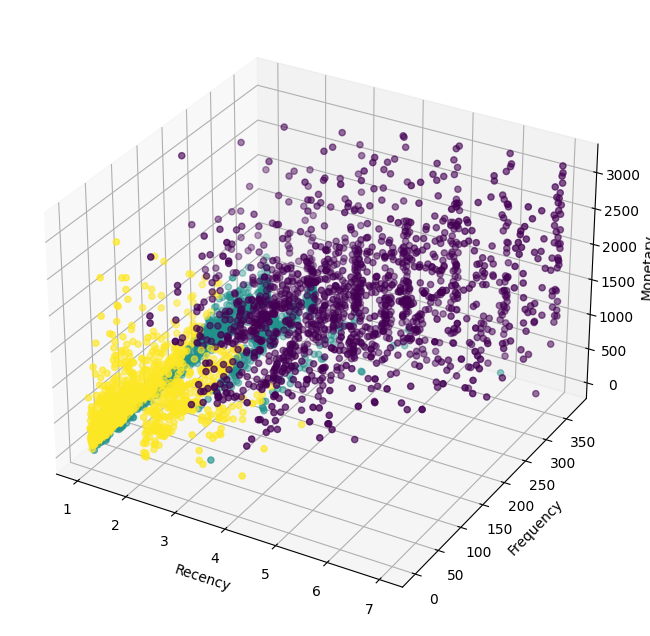

In [306]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

labels = KMeans(n_clusters=optimal_kmeans_clusters, random_state = 42).fit_predict(X_pca)
ax.scatter(rfm_table['Frequency'].to_list(), rfm_table['Recency'].to_list(), rfm_table['Monetary'].to_list(), c=labels)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

plt.show()

#### 3.2.2. Построение профиля кластеров

Далее составьте так называемый профиль кластеров. Для этого вам необходимо вернуться от декомпозированных данных (если вы производили понижение размерности) к RFM-таблице (очищенной от выбросов).

Сгруппируйте RFM-таблицу по полученным кластерам и рассчитайте среднее по каждому из признаков.

Чтобы результаты было проще интерпретировать, давайте познакомимся с одним из способов визуализации профиля кластеров — **Radar Chart** (полярная диаграмма, или диаграмма паутины). Это графическое представление значений нескольких эквивалентных категорий в форме паутины.

Radar Chart часто используется при определении профиля кластеров. На концах паутины откладываются оси, соответствующие признакам, описывающим объекты. На каждой из осей для каждого кластера откладываются средние значения соответствующих характеристик. Соединив точки по осям, мы получаем многоугольник. 

Пример полярной диаграммы для задачи кластеризации учеников по интересам:

<img src=https://www.datanovia.com/en/wp-content/uploads/2020/12/radar-chart-in-r-customized-fmstb-radar-chart-1.png width=500>

На этой диаграмме мы видим визуализацию признаков для одного из кластеров. Видно, что ученики, принадлежащие этому кластеру, в большей степени увлекаются музыкой (Music), а в меньшей — программированием (Programm).

В модуле `graph_objects` библиотеки `plotly` есть встроенная функция `Scatterpolar`, которая позволяет построить полярную диаграмму. На основе этой функции мы подготовили для вас функцию `plot_cluster_profile()`, которая позволяет визуализировать профиль каждого из кластеров в виде полярной диаграммы. У неё есть два параметра: `grouped_data` — сгруппированные по кластерам характеристики объектов (клиентов), `n_clusters` — количество кластеров.

Главное условие использования полярной диаграммы — все признаки должны быть приведены к единому масштабу с помощью нормализации, где 1 будет означать максимум, а 0 — минимум. Шаг с нормализацией мы также добавили в функцию `plot_cluster_profile()`.


In [308]:
from sklearn.preprocessing import MinMaxScaler

def plot_cluster_profile(grouped_data, n_clusters):
    """Функция для визуализации профиля кластеров в виде полярной диаграммы.

    Args:
        grouped_data (DataFrame): таблица, сгруппированная по номерам кластеров с агрегированными характеристиками объектов.
        n_clusters (int): количество кластеров
    """
    # Нормализуем сгруппированные данные, приводя их к масштабу 0-1.
    scaler = MinMaxScaler()
    grouped_data = pd.DataFrame(scaler.fit_transform(grouped_data), columns=grouped_data.columns)
    # Создаём список признаков
    features = grouped_data.columns
    # Создаём пустую фигуру
    fig = go.Figure()
    # В цикле визуализируем полярную диаграмму для каждого кластера
    for i in range(n_clusters):
        # Создаём полярную диаграмму и добавляем её на общий график
        fig.add_trace(go.Scatterpolar(
            r=grouped_data.iloc[i].values, # радиусы
            theta=features, # название засечек
            fill='toself', # заливка многоугольника цветом
            name=f'Cluster {i}', # название — номер кластера
        ))
    # Обновляем параметры фигуры
    fig.update_layout(
        showlegend=True, # отображение легенды
        autosize=False, # устаналиваем свои размеры графика
        width=800, # ширина (в пикселях)
        height=800, # высота (в пикселях)
    )
    # Отображаем фигуру
    fig.show()

Теперь у вас есть удобный инструмент для анализа профиля кластеров. Воспользуйтесь им, чтобы проинтерпретировать результаты, полученные на предыдущем шаге.

In [320]:
# plot_cluster_profile(rfm_table[['Recency', 'Frequency', 'Monetary']], 3)
grouped_data = rfm_table.groupby(by='label').mean()
plot_cluster_profile(grouped_data, optimal_kmeans_clusters)

## 5. Выводы и оформление работы

Напишите заключение о проделанной работе и полученных результатах. Отметьте, какие сегменты клиентов вам удалось найти в данных.

После завершения проекта создайте в своём репозитории файл README.md и кратко опишите содержимое проекта по принципу, который мы приводили ранее.

Выложите свой проект на GitHub и оформите удалённый репозиторий, добавив в него описание и теги репозитория (теги придумайте самостоятельно в зависимости от того, какую задачу вы решали).

Выводы:

Распределение клиентов в пространстве признаков RFM не обладает явно обособленной кластеризацией. 

Данные были нормализованы, т.к. данные не имеют нормального распределения. Дополнительно были прологарифмированы признаки Monetary и Frequency.

При обучении модели оценка силуэта дала 3 оптимальных сегмента клиентов.
Судя по трехмерному рисунку можно сказать, что мы получили три кластера с такими харак-ми:
- кластер_0 - зажат в углу низкой монетарности, частоты и новизны.
- кластер_1 - Вторая группа преобладает ближе к новизне, частоте и маленькими суммамми покупок
- кластер_2 - (многочисленная). Выше средней -частота посещения, покупки от средней к максимумам. Новизна от чуть выше минимума и до максимума.